Это решение большого задания в уроке 3.5 на степике. 
https://stepik.org/lesson/209697/step/3?unit=183201

Задача про грибы, какие съедобные какие несъедобные. Определение съедобности по признакам. 

In [30]:
url = 'https://stepik.org/media/attachments/course/4852/training_mush.csv' # Путь к исходному датасету

In [24]:
'https://stepik.org/media/attachments/course/4852/training_mush.csv'

'https://stepik.org/media/attachments/course/4852/training_mush.csv'

Импорт библиотек

In [2]:
import pandas as pd
import numpy as np 

Импорт датафрейма и его просмотр

In [5]:
mush = pd.read_csv(url)
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


Статистика для отдельных колонок

In [6]:
mush.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,...,6093.000000,6093.000000,6093.0,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000
mean,3.357624,1.836862,4.500246,0.416051,4.171672,0.975546,0.161169,0.308551,4.806992,0.568849,...,5.809125,5.790415,0.0,1.968160,1.068767,2.276711,3.589201,3.639422,1.497292,0.482521
std,1.608300,1.231684,2.547747,0.492943,2.114982,0.154467,0.367717,0.461933,3.551632,0.495278,...,1.907454,1.917425,0.0,0.231266,0.271237,1.802159,2.381904,1.265664,1.716782,0.499735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


Импорт из модуля машинного обучения 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Выделение колонки с результатом классификации. X - вектор признаков, y - вектор результата (0 - несъедобно, 1 - съедобно)

In [8]:
X = mush.drop('class', axis=1)
y = mush['class']

Создание случайного леса. n_jobs=-1 means using all processors. random_state=0 - начальное состояние рандомизатора

In [18]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

Самая интересная часть. Мы будем заниматься подбором следующих гиперпараметров:

n_estimators — число «деревьев» в «случайном лесу».
max_features — число признаков для выбора расщепления.
max_depth — максимальная глубина деревьев.
min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
min_samples_leaf — минимальное число объектов в листьях.
bootstrap — использование для построения деревьев подвыборки с возвращением.

cvint, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy.

The criterion method evaluates the split in the tree. The scoring method evaluates the quality of the model as a whole.

Все параметры задаются диапазоном с шагом, и тогда из этого множества будет выбрано лучшее сочетание

In [27]:
grid_search_cv_clf = GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 13, 2),
                         'min_samples_split': range(2, 10, 2),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': range(10, 51, 10)})

Обучение случайного леса

In [38]:
clf = grid_search_cv_clf.fit(X, y)

Лучшие параметры

In [3]:
grid_search_cv_clf.best_params_

NameError: name 'grid_search_cv_clf' is not defined

Важность фичей и отрисовка этой важности на графике

In [50]:
import matplotlib.pyplot as plt

In [44]:
clf.best_estimator_.feature_importances_

array([0.00306107, 0.00625037, 0.024689  , 0.06342603, 0.22663839,
       0.00043558, 0.06013994, 0.08357853, 0.07643119, 0.02049528,
       0.07729668, 0.03423649, 0.03895524, 0.02835467, 0.01322916,
       0.        , 0.01185759, 0.0110744 , 0.08977863, 0.03312335,
       0.05024433, 0.04670409])

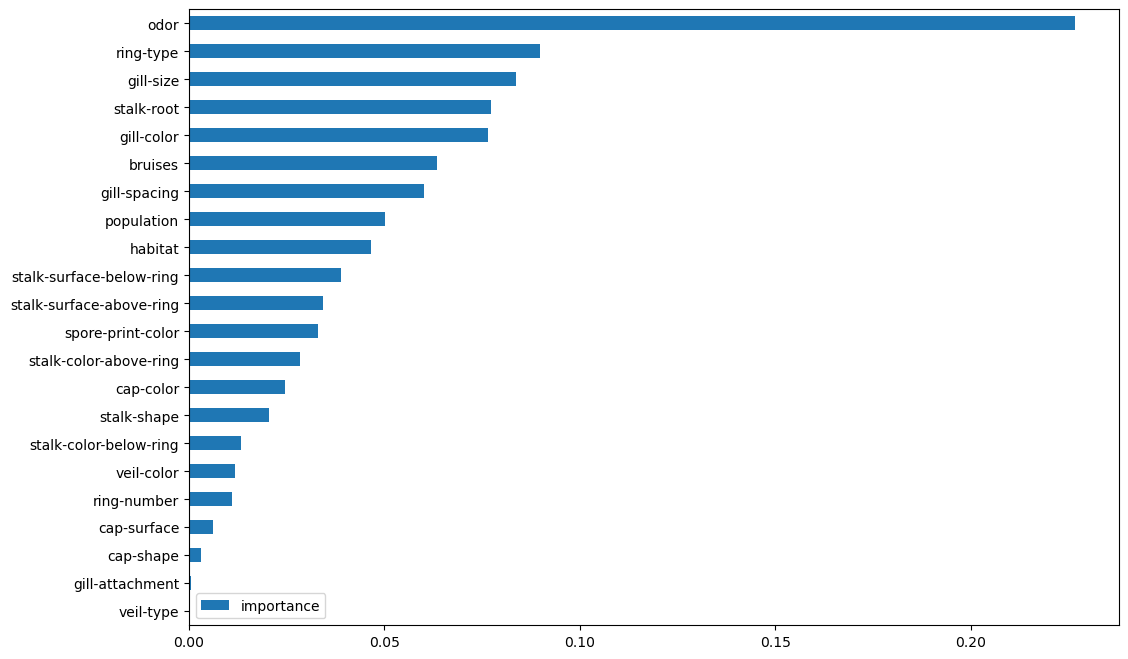

In [54]:
imp = pd.DataFrame(grid_search_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

Теперь есть датасет только с фичами и нужно определить - какой гриб с фичами съедобный, а какой нет. 

In [56]:
url2 = 'https://stepik.org/media/attachments/course/4852/testing_mush.csv'

In [61]:
test = pd.read_csv(url2)
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


Предсказание! По заданию нужно было посчитать количество съедобных грибов

In [64]:
y_pred = grid_search_cv_clf.predict(test)

Построение какой то там матрицы, сравнение предсказаний и реальных данных

In [75]:
import seaborn as sns

In [66]:
url3 = 'https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip'

In [69]:
import requests, zipfile, io 
import pandas as pd

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
txtfiles = z.namelist()
right_mush = pd.read_csv(z.open(txtfiles[0], "r", pwd='Cool!Move_forward!'.encode('cp850', 'replace')))

In [70]:
y_true = right_mush

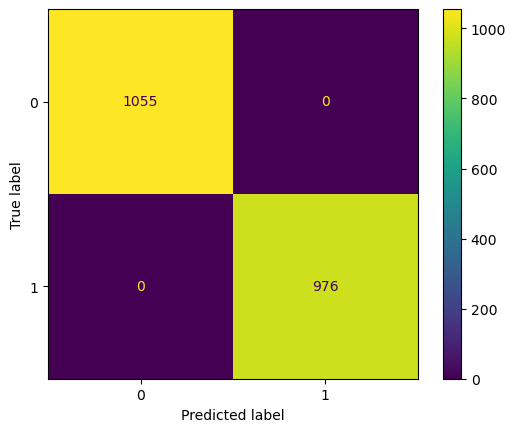

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
displ = ConfusionMatrixDisplay(cm)
displ.plot()

<Axes: >

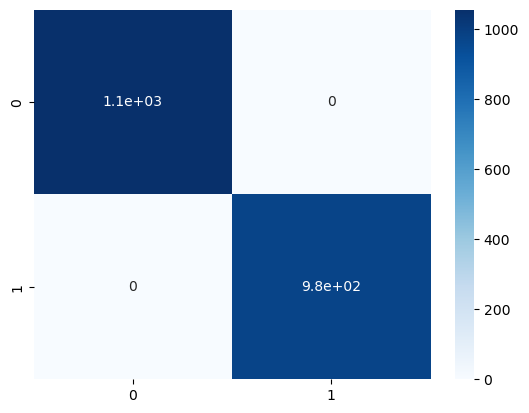

In [76]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")